# Review from last week

## Pandas review

* Import .txt, .csv, and other tabular data using the ```pandas``` package
  * Use the ```pandas.read_csv()``` function
* Peer into a pandas DataFrame object using ```.head()``` and ```.describe()```
* Use the ```.plot()``` syntax to plot a full data frame or specific parts


* Pandas data frames store 2D data (series objects store 1D data)
  1. ```columns``` corresponds to column labels, and ```index``` corresponds to row labels
  2. Extract a dataframe's column using either ```dataframe.column_name``` or ```dataframe['column_name']```
  3. Extract multiple rows using index ranges:  ```dataframe[0:3]``` or ```dataframe[index1_label:index3_label]```
* Data frames are quickly manipulated using the object oriented "dot" notation, e.g., ```dataframe.mean()``` or ```dataframe.apply(function)```
* Data can be sorted and grouped by the values or categories in different columns, e.g., ```dataframe.groupby('column_name')```

## Matplotlib review

* See the [anatomy of a figure](https://matplotlib.org/tutorials/introductory/usage.html) documentation for more comprehensive info on creating plots

* Make a **quick** plot using ```plt.plot(x,y)``` or ```plt.contourf(x,y,z)```


* Create a more flexible figure in a few steps:
  1. Create the ```fig``` object:  ```fig = plt.figure()```
  2. Add axes instances (and panel plots):  ```ax = fig.add_subplot(1,1,1)```
  3. Create the actual plot using the plotting methods via the ```Axes``` object:  ```ax.plot()```, ```ax.contourf()```, etc.

<img src="fig_map.png"></img>

* Use scatter plots or ```matplotlib.mpl_toolkits.mplot3d``` to plot 3D information
  * In the case of 3D axes, use a ```projection=``` keyword in ```fig.add_subplot()```

# Now:  introduction to xarray

* xarray is the higher-dimensional version of pandas
* It's ideal for reading and writing NetCDF files, and it interfaces well with parallel programming options within Python

This notebook follows the [official xarray documentation](http://xarray.pydata.org/en/stable/examples/quick-overview.html)... sort of.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

Whereas in pandas we used a **data frame** object, the equivalent for xarray is the **data array** object.

## ```DataArray``` objects

**Four key properties:**
* ```data_array.values``` - *access the data as a numpy array*
* ```data_array.dims``` - *get the dimension information*
* ```data_array.coords``` - *get the associated coordinates*
* ```data_array.attrs``` - *attributes*

**Start with Irvine climate (precip, tmin, tmax) data** from [https://www.usclimatedata.com/climate/irvine/california/united-states/usca2494](https://www.usclimatedata.com/climate/irvine/california/united-states/usca2494)

In [2]:
month_integers = np.array((1,2,3,4,5,6,7,8,9,10,11,12))
month_names = np.array(('January','February','March','April',
                        'May','June','July','August','September',
                        'October','November','December'))

irvine_precip = np.array((69,92,62,22,6,3,1,1,6,17,29,58), dtype=np.float)
irvine_tmax = np.array((18.3,18.5,19.2,21.4,22.7,24.7,27.5,28.3,27.2,24.3,20.8,17.9))
irvine_tmin = np.array((8.6,8.7,9.3,10.5,13.1,14.8,16.8,17.2,16.2,13.8,10.8,8.2))

**Visualize the arrays we made:**

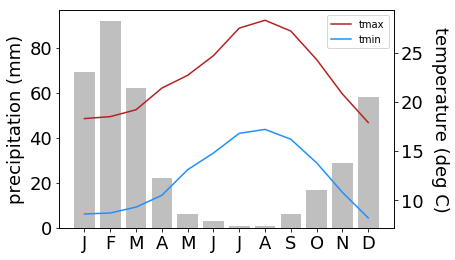

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.bar(month_integers, irvine_precip, color='0.75')
ax.set_ylabel('precipitation (mm)', fontsize=18)

ax_temp = ax.twinx()
ax_temp.plot(month_integers, irvine_tmax, c='firebrick', label='tmax')
ax_temp.plot(month_integers, irvine_tmin, c='dodgerblue', label='tmin')
ax_temp.set_ylabel('temperature (deg C)', fontsize=18, rotation=-90, labelpad=25)

ax.tick_params(labelsize=18)
ax_temp.tick_params(labelsize=18)

ax_temp.legend()
ax.set_xticks(month_integers);
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D']);

**Feed the ```irvine_precip``` array directory into a ```DataArray``` structure:**

In [4]:
precip_da = xr.DataArray(irvine_precip)
print(precip_da)

<xarray.DataArray (dim_0: 12)>
array([69., 92., 62., 22.,  6.,  3.,  1.,  1.,  6., 17., 29., 58.])
Dimensions without coordinates: dim_0


**Last week we learned how to create a pandas ```Series``` object with an index that gives dimensional information:**

In [5]:
precip_series = pd.Series(irvine_precip, index=month_names)
print(precip_series)

January      69.0
February     92.0
March        62.0
April        22.0
May           6.0
June          3.0
July          1.0
August        1.0
September     6.0
October      17.0
November     29.0
December     58.0
dtype: float64


**Convert this series into a xarray DataArray object in one line.  If we don't specify coords or dims, it will make assumptions for us:**

In [6]:
precip_da = xr.DataArray(precip_series, name='precip')
print(precip_da)
#print(precip_da.values)
#print(precip_da.dims)
#print(precip_da.coords)

<xarray.DataArray 'precip' (dim_0: 12)>
array([69., 92., 62., 22.,  6.,  3.,  1.,  1.,  6., 17., 29., 58.])
Coordinates:
  * dim_0    (dim_0) object 'January' 'February' ... 'November' 'December'


**This time, create the DataArray with explicit coordinate and dimension information:**

In [7]:
precip_da = xr.DataArray(precip_series, name='precip',
                         coords={'month':month_names},
                         dims=('month'))

# add attributes
precip_da.attrs = {'units':'mm per month'}

print(precip_da)

<xarray.DataArray 'precip' (month: 12)>
array([69., 92., 62., 22.,  6.,  3.,  1.,  1.,  6., 17., 29., 58.])
Coordinates:
  * month    (month) <U9 'January' 'February' 'March' ... 'November' 'December'
Attributes:
    units:    mm per month


**Indexing with xarray borrows pandas syntax**

**1. By coordinate index** using brackets, ```[]```:

In [8]:
precip_da[[11,0,1]]

<xarray.DataArray 'precip' (month: 3)>
array([58., 69., 92.])
Coordinates:
  * month    (month) <U9 'December' 'January' 'February'
Attributes:
    units:    mm per month

**2. By coordinate label** using ```.loc()```:

In [9]:
precip_da.loc[['December','January','February']] # pull out DJF

<xarray.DataArray 'precip' (month: 3)>
array([58., 69., 92.])
Coordinates:
  * month    (month) <U9 'December' 'January' 'February'
Attributes:
    units:    mm per month

In [10]:
precip_da.loc['June':'August'] # pull out JJA

<xarray.DataArray 'precip' (month: 3)>
array([3., 1., 1.])
Coordinates:
  * month    (month) <U9 'June' 'July' 'August'
Attributes:
    units:    mm per month

**3. By dimension indices** using ```isel()```:

In [11]:
precip_da.isel(month=slice(5,8))

<xarray.DataArray 'precip' (month: 3)>
array([3., 1., 1.])
Coordinates:
  * month    (month) <U9 'June' 'July' 'August'
Attributes:
    units:    mm per month

**4. By dimension name and coordinate label** using ```.sel()```:

In [12]:
precip_da.sel(month='March')

<xarray.DataArray 'precip' ()>
array(62.)
Coordinates:
    month    <U9 'March'
Attributes:
    units:    mm per month

In [13]:
precip_da.sel(month=slice('March','May'))

<xarray.DataArray 'precip' (month: 3)>
array([62., 22.,  6.])
Coordinates:
  * month    (month) <U9 'March' 'April' 'May'
Attributes:
    units:    mm per month

**Take the mean across specific dimensions using pandas-like syntax:**

In [14]:
precip_da.mean(dim='month')

<xarray.DataArray 'precip' ()>
array(30.5)

**Similarly, create a DataArray of daily max and min temperature**

In [15]:
tmin_da = xr.DataArray(irvine_tmin, name='tmin',
                       coords={'month':month_names},
                       dims=('month'), attrs={'units':'deg C'})

tmax_da = xr.DataArray(irvine_tmax, name='tmax',
                       coords={'month':month_names},
                       dims=('month'), attrs={'units':'deg C'})

## ```DataSet``` object

This is how xarray stores NetCDF files in memory.  
```DataSet``` objects are dictionary-like containers of ```DataArray``` objects

Note a **dictionary** in python is something with ```key:value``` pairs enclosed by curly brackets ```{}```:

In [16]:
example_dict = { 'apple':95, 'banana':105, 'orange':87} # calories in medium piece of fruit

# print the value of a given key as:
print(example_dict['apple'])

95


**To create an xarray data set, feed in a dictionary of the data arrays.  Note the label in quotes below will be the variable name:**

In [17]:
irvine_ds = xr.Dataset({'pr':precip_da,
                        'tmin':tmin_da,
                        'tmax':tmax_da })

In [18]:
irvine_ds

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) <U9 'January' 'February' 'March' ... 'November' 'December'
Data variables:
    pr       (month) float64 69.0 92.0 62.0 22.0 6.0 ... 1.0 6.0 17.0 29.0 58.0
    tmin     (month) float64 8.6 8.7 9.3 10.5 13.1 ... 17.2 16.2 13.8 10.8 8.2
    tmax     (month) float64 18.3 18.5 19.2 21.4 22.7 ... 27.2 24.3 20.8 17.9

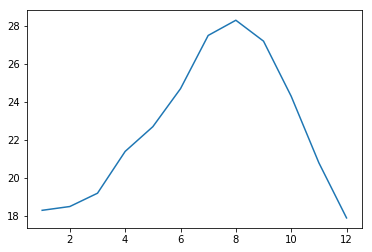

In [19]:
plt.plot(month_integers, irvine_ds['tmax'])

**Similar operations work on ```DataSet``` objects that worked on pandas ```DataFrame``` objects:**

In [20]:
irvine_ds_tmean = irvine_ds.mean(dim='month')
irvine_ds_tmean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    pr       float64 30.5
    tmin     float64 12.33
    tmax     float64 22.57

**Create a NetCDF file using the ```.to_netcdf()``` syntax.**  
Specify an unlimited dimension (typically time) using the ```unlimited_dims``` keyword.  This creates a record dimension, which is useful for tools like NCO.

In [21]:
irvine_ds.to_netcdf('example_irvine_precip_tmin_tmax.nc', unlimited_dims=['month'])

# Key points

* **Create an xarray ```DataArray``` (one variable with dims, coords, attributes, etc.) via:**


    precip_da = xr.DataArray(precip_series, name='precip',
                             coords={'month':month_names},
                             dims=('month'))

* Note ```precip_series``` is a pandas ```Series``` object
* Many of the familiar indexing syntax works on these data arrays


* **Create an xarray ```DataSet``` (one or more variables within a NetCDF-like file) using a dictionary syntax:**


    irvine_ds = xr.Dataset({'precip':precip_da,
                            'tmin':tmin_da,
                            'tmax':tmax_da })

* Familiar indexing works on these data sets, too.  [It's worth reading the documentation on this](http://xarray.pydata.org/en/stable/indexing.html).
* Save the data set as a netcdf file using the ```dataset.to_netcdf()``` syntax